In [44]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados = pd.read_csv(uri)
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [45]:
a_renomear = {
    "expected_hours" : "horas_esperadas",
    "price" : "preco",
    "unfinished" : "nao_finalizado"
}
dados = dados.rename(columns = a_renomear)
dados.head()

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [46]:
troca = {
    0 : 1,
    1 : 0
}
dados["finalizado"] = dados.nao_finalizado.map(troca)
dados.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


<AxesSubplot:xlabel='horas_esperadas', ylabel='preco'>

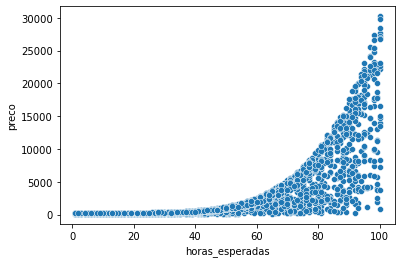

In [47]:
import seaborn as sns

sns.scatterplot (x="horas_esperadas", y="preco", data=dados)

<AxesSubplot:xlabel='horas_esperadas', ylabel='preco'>

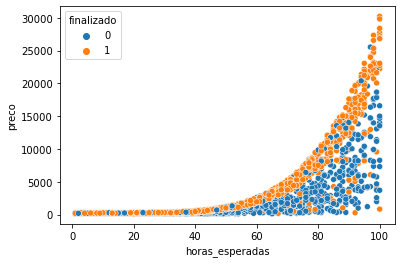

In [48]:
sns.scatterplot(x="horas_esperadas", y="preco", data=dados, hue="finalizado")

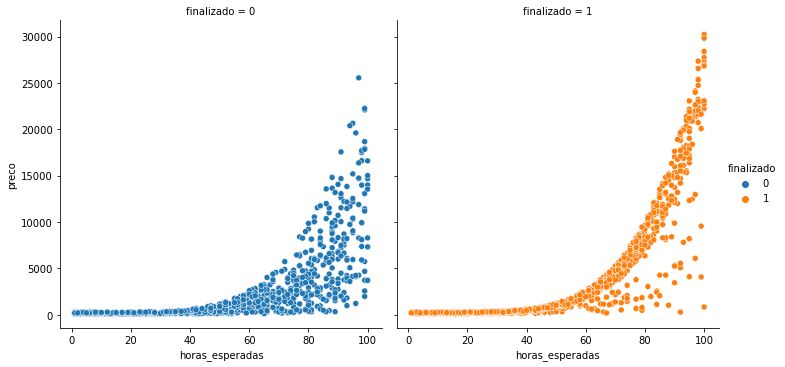

In [49]:
# plot relativo..
sns.relplot(x="horas_esperadas", y="preco",hue= "finalizado", data=dados, col="finalizado")

In [50]:
x = dados[["horas_esperadas", "preco"]]
y = dados["finalizado"]

from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

SEED = 38383838
# LinearSVC usa como random_state padrão o np.random, então botando um np.random padrão, ele vai manter tanto no modelo quanto no treino
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                         random_state = SEED, test_size = 0.25,
                                                         stratify=y)
print ("Treinamos com %d elementos e testaremos com %d elementos" %(len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit (treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) *100
print ("A acurácia foi %.2f%%" % acuracia)

Treinamos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 64.63%


C:\Users\huara\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [51]:
previsoes_de_base = np.ones(540)
acuracia = accuracy_score(teste_y, previsoes_de_base) *100
print ("A previsoes de base foi %.2f%%" % acuracia)

A previsoes de base foi 52.59%


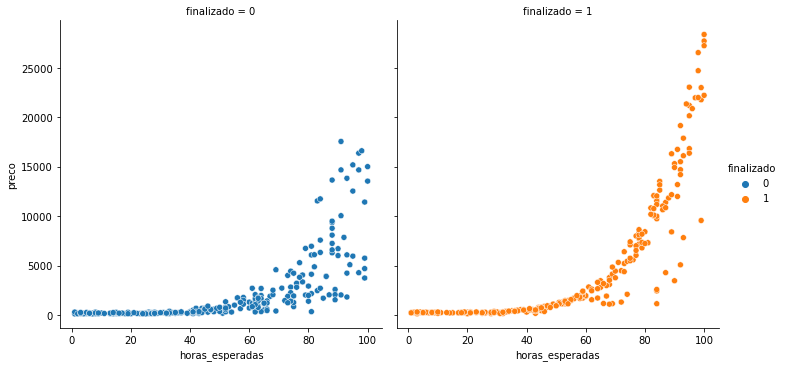

In [52]:
sns.relplot(x="horas_esperadas", y="preco",hue=teste_y, data=teste_x, col=teste_y)

<AxesSubplot:xlabel='horas_esperadas', ylabel='preco'>

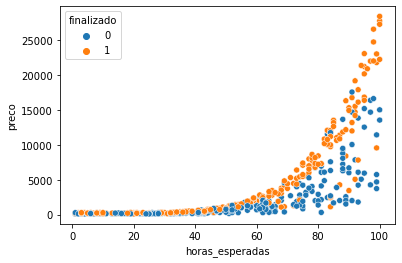

In [53]:
# analize visual
sns.scatterplot(x="horas_esperadas", y="preco",hue=teste_y, data=teste_x)

In [54]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()
print(x_min, x_max, y_min, y_max)

1 100 102 28398


In [55]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

In [56]:
# agora vamos criar um grid juntando eixo x e y
xx, yy = np.meshgrid(eixo_x, eixo_y)
xx.ravel()

array([ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01])

In [57]:
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.0000e+00, 1.0200e+02],
       [1.9900e+00, 1.0200e+02],
       [2.9800e+00, 1.0200e+02],
       ...,
       [9.7030e+01, 2.8398e+04],
       [9.8020e+01, 2.8398e+04],
       [9.9010e+01, 2.8398e+04]])

In [58]:
# agora faremos nosso modelo prever com base nos pontos
Z = modelo.predict(pontos)
print (Z.shape)
print (xx.shape)

(10100,)
(101, 100)


In [59]:
# redimencionando de acordo com..
Z = Z.reshape(xx.shape)
Z

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int64)

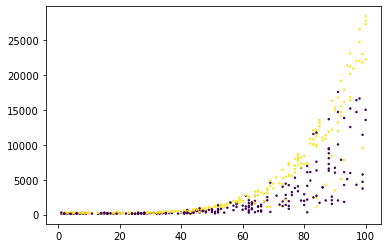

In [60]:
import matplotlib.pyplot as plt

plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s = 2)
# c = cor, s = tamanho do spontos

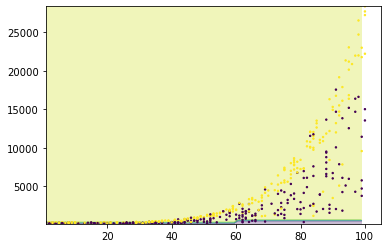

In [61]:
plt.contourf(xx, yy, Z, alpha=0.3) # alpha = transparencia
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s = 2)

# aqui podemos ver a curva de decisão
# decision Boundary

In [62]:
# nesse caso vemos que esse algoritmo não é bom neste
# caso pois uma linha reta não nos ajudaria aqui.

In [63]:
x = dados[["horas_esperadas", "preco"]]
y = dados["finalizado"]

In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

SEED = 504
np.random.seed(SEED) # LinearSVC usa como random_state padrão o np.random, então botando um np.random padrão, ele vai manter tanto no modelo quanto no treino
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y,
                                                         random_state = SEED, test_size = 0.25,
                                                         stratify=y)
print ("Treinamos com %d elementos e testaremos com %d elementos" %(len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit (treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) *100
print ("A acurácia foi %.2f%%" % acuracia)

Treinamos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 69.26%


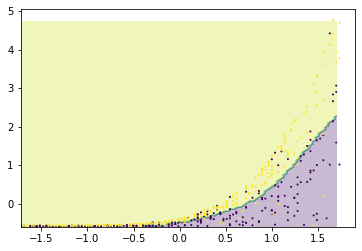

In [68]:
data_x = teste_x[:,0]
data_y = teste_x[:,1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(data_x, data_y, c=teste_y, s=1)

# DECISION BOUNDARY